In [1]:
%reset -f
%reload_ext autoreload
%autoreload 2

import os
import sys
import importlib
import numpy as np
import pandas as pd

# Set root directory dynamically
ROOT_DIR = r'C:\Users\edens\Documents\GitHub\LabCode\MolFeatures'
sys.path.append(ROOT_DIR)
os.chdir(ROOT_DIR)
sys.path.append('M3_modeler')
sys.path.append('M2_data_extractor')
# Remove old module from cache
sys.modules.pop('data_extractor', None)
# Import modules and reload
try:
    os.chdir('M2_data_extractor')
    from data_extractor import Molecules, extract_connectivity
    from feather_extractor import logs_to_feather
    import data_extractor
    import feather_extractor
    import gaussian_handler
    from gaussian_handler import feather_file_handler
    os.chdir('../utils')
    from help_functions import dict_to_horizontal_df, get_df_from_file
    from visualize import show_single_molecule
    import help_functions
    os.chdir('../M3_modeler')
    from modeling import (
        ClassificationModel,
        LinearRegressionModel,
        fit_and_evaluate_single_combination_regression
    )
    import plot
    import modeling


    
    
    
except ModuleNotFoundError as e:
    print(f"Error: {e}")
    print("Make sure the module is in the correct directory and the Python environment is set up properly.")

# Ensure Pandas displays all columns
pd.set_option('display.max_columns', None)

# Define paths
log_files_path = None  # Example: r'C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\Blackwell_logs'
if log_files_path:
    logs_to_feather(log_files_path)

# feather_path = r'C:\Users\edens\Documents\GitHub\lucas_project\new_update_logs\feather_files'
feather_path=r'C:\Users\edens\Documents\GitHub\lucas_project\Secondary_Sphere\feather_benzal'
# feather_path=r'C:\Users\edens\Documents\GitHub\lucas_project\Doyle2021\logfiles\feather_files'
os.chdir(feather_path)

# Load molecular data
mols = data_extractor.Molecules(feather_path)

# Define dictionary of answers
answers_dict = {
    "Ring Vibration atoms": "9",
    "Strech Vibration atoms": "1,2 4,5",
    "Bending Vibration atoms": "22,23",
    "Dipole atoms": "11,6 4 10,11,12 11,12 5 4,5,1 4,3,2",
    "NPA manipulation atoms": "11,6 4 10,11,12 11,12,5 4,5,1 4,3,2",
    "Sub-Atoms": "1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25",
    "Charge values": "1,3,5,11,8,12,14",
    "Charge difference": "11,5 3,5 11,12 12,5",
    "Sterimol atoms": "4,6 6,4 4,3 11,6",
    "Bond length": "11,12 6,4 12,13 12,5 12,14 4,3",
    "Bond Angle": "11,6 4,6 4,5 1,5,4,3 11,6,4,5"
}

list_answers = [
    [9], [1600], [], [1200], [22, 23],
    [[11, 6, 4], [10, 11, 12], [11, 12, 5], [4, 5, 1], [4, 3, 2]],
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
    [[11, 6, 4], [10, 11, 12], [11, 12, 5], [4, 5, 1], [4, 3, 2]],
    [1, 3, 5, 11, 8, 12, 14],
    [[11, 5], [3, 5], [11, 12], [12, 5]],
    [[4, 6], [6, 4], [4, 3], [11, 6]],
    [[11, 12], [6, 4], [12, 13], [12, 5], [12, 14], [4, 3]],
    [[11, 6, 4], [6, 4, 5], [1, 5, 4, 3], [11, 6, 4, 5]]

]


Molecules Loaded: ['Br-3.feather', 'Br-35.feather', 'Br-4.feather', 'CF3-3.feather', 'CF3-4.feather', 'Cl-3.feather', 'Cl-35.feather', 'Cl-4.feather', 'CN-4.feather', 'COOMe-3.feather', 'COOMe-4.feather', 'F-3.feather', 'F-4.feather', 'I-3.feather', 'I-4.feather', 'NO2-3.feather'] Failed Molecules: []


[ 1  2  3  4  5  6  7  8  9 10 13 14]


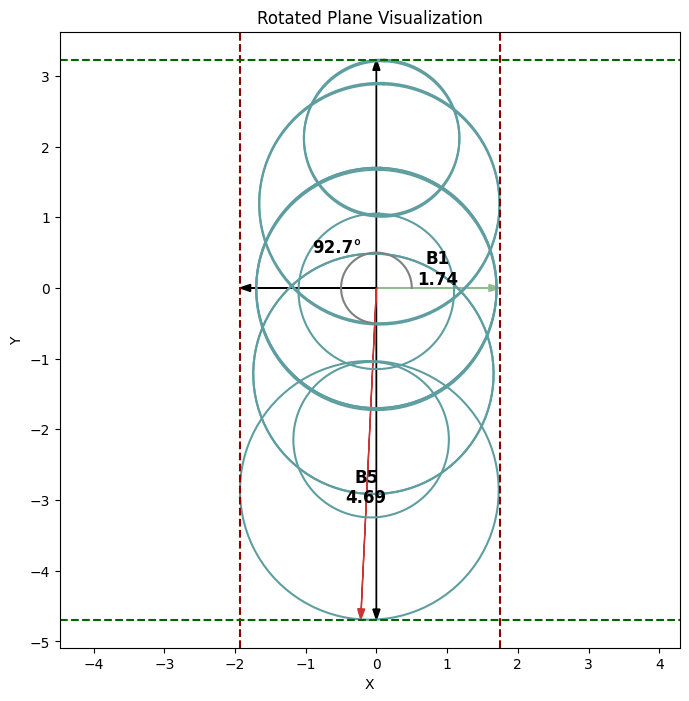

,B1,B5,L,loc_B5,B1_B5_angle
10-4,1.7418,4.6943,6.4379,4.4752,92.7081


In [8]:
mols.molecules[0].get_sterimol([10,4],radii='bondi',visualize=True)

In [15]:
mols.visualize_molecules([0])

{frozenset({0, 1}): 1.39, frozenset({1, 2}): 1.38, frozenset({2, 3}): 1.39, frozenset({3, 4}): 1.39, frozenset({4, 5}): 1.39, frozenset({9, 10}): 1.2, frozenset({9, 11}): 1.11, frozenset({1, 13}): 1.08, frozenset({8, 4}): 1.08, frozenset({0, 5}): 1.39, frozenset({2, 7}): 1.08, frozenset({0, 6}): 1.08, frozenset({9, 3}): 1.48, frozenset({12, 5}): 1.89}


In [3]:
df=mols.get_molecules_comp_set_app(answers_dict=None,answers_list_load=list_answers)
df

None
No benzene ring found.
this molecule is  B_1
No benzene ring found.
this molecule is  B_12
No benzene ring found.
this molecule is  B_13
No benzene ring found.
this molecule is  B_2
No benzene ring found.
this molecule is  B_4
No benzene ring found.
this molecule is  B_5_2
No benzene ring found.
this molecule is  B_5_3
No benzene ring found.
this molecule is  B_6
No benzene ring found.
this molecule is  B_7
No benzene ring found.
this molecule is  B_7_2
No benzene ring found.
this molecule is  B_7_3
No benzene ring found.
this molecule is  CF3_N2
No benzene ring found.
this molecule is  L16
No benzene ring found.
this molecule is  L16_2
No benzene ring found.
this molecule is  L16_3
No benzene ring found.
this molecule is  L17
No benzene ring found.
this molecule is  L17_2
No benzene ring found.
this molecule is  L17_3
No benzene ring found.
this molecule is  L18
No benzene ring found.
this molecule is  L18_2
No benzene ring found.
this molecule is  L18_3
No benzene ring found.
th

,dip_x_NPA_11-6-4,dip_y_NPA_11-6-4,dip_z_NPA_11-6-4,total_dipole_NPA_11-6-4,dip_x_NPA_10-11-12,dip_y_NPA_10-11-12,dip_z_NPA_10-11-12,total_dipole_NPA_10-11-12,dip_x_NPA_11-12-5,dip_y_NPA_11-12-5,dip_z_NPA_11-12-5,total_dipole_NPA_11-12-5,dip_x_NPA_4-5-1,dip_y_NPA_4-5-1,dip_z_NPA_4-5-1,total_dipole_NPA_4-5-1,dip_x_NPA_4-3-2,dip_y_NPA_4-3-2,dip_z_NPA_4-3-2,total_dipole_NPA_4-3-2,dipole_x_11-6-4,dipole_y_11-6-4,dipole_z_11-6-4,total_dipole_11-6-4,dipole_x_10-11-12,dipole_y_10-11-12,dipole_z_10-11-12,total_dipole_10-11-12,dipole_x_11-12-5,dipole_y_11-12-5,dipole_z_11-12-5,total_dipole_11-12-5,dipole_x_4-5-1,dipole_y_4-5-1,dipole_z_4-5-1,total_dipole_4-5-1,dipole_x_4-3-2,dipole_y_4-3-2,dipole_z_4-3-2,total_dipole_4-3-2,nbo_atom_1,nbo_atom_3,nbo_atom_5,nbo_atom_11,nbo_atom_8,nbo_atom_12,nbo_atom_14,B1_4-6,B5_4-6,L_4-6,loc_B5_4-6,B1_B5_angle_4-6,B1_6-4,B5_6-4,L_6-4,loc_B5_6-4,B1_B5_angle_6-4,B1_4-3,B5_4-3,L_4-3,loc_B5_4-3,B1_B5_angle_4-3,B1_11-6,B5_11-6,L_11-6,loc_B5_11-6,B1_B5_angle_11-6,bond_length_11-12,bond_length_6-4,bond_length_12-13,bond_length_12-5,bond_length_12-14,bond_length_4-3,"angle_[11, 6, 4]","angle_[6, 4, 5]","dihedral_[1, 5, 4, 3]","dihedral_[11, 6, 4, 5]"
B_12,-1.099647,-2.504987,1.530988,3.134981,2.044364,1.504449,-2.398089,3.491937,-2.980551,0.098420,-1.193793,3.212244,-1.789812,-1.113282,-1.864025,2.813790,-2.072908,-1.322532,1.760435,3.024098,-0.259623,-1.210699,-0.850839,1.5024,-0.271105,1.453051,-0.268824,1.5024,-0.663563,-1.347887,0.002230,1.5024,0.277386,-1.450603,-0.275554,1.5024,-1.358938,0.640626,0.002567,1.5024,0.38478,-0.09949,-0.47711,-0.39533,0.19201,-0.39587,-0.39153,1.6875,2.9908,4.2512,0.3978,97.0369,1.9364,5.0291,8.4492,5.6250,126.9132,1.4992,4.1412,3.2457,0.8382,173.5250,1.9327,4.4373,6.6296,0.0399,103.5070,2.510420,3.251237,2.143756,2.965236,2.942144,1.543097,10.890643,28.772013,6.943201,103.033279
B_13,0.187837,-0.024728,1.816014,1.825870,0.391640,1.304747,-1.095980,1.748405,0.153213,-0.869579,-1.351194,1.614115,-0.150848,1.077736,1.822574,2.122744,0.698939,-0.814840,-1.595871,1.923352,1.205340,-0.556823,-0.638431,1.4733,1.176049,-0.854089,0.240692,1.4733,-0.558081,1.363382,0.015000,1.4733,0.391524,-1.389362,-0.294739,1.4733,-1.273426,0.740085,-0.033929,1.4733,0.38540,-0.10054,-0.48045,-0.40093,0.19266,-0.38449,0.22480,1.6844,2.9886,4.2516,0.3997,98.2394,1.9427,6.6486,9.5056,4.7608,130.8759,1.4992,4.1404,3.2438,0.8432,172.5940,1.4992,4.0269,5.9950,3.0043,169.8984,2.549962,3.251610,2.148656,3.825198,3.378003,1.541426,26.203142,28.772806,8.425903,20.725987
CF3_N2,-1.994888,-1.670106,-1.064224,2.810943,-0.019582,2.896245,-0.505146,2.940032,-2.812443,0.175551,-0.676572,2.898000,2.681062,0.156462,0.689758,2.772785,1.025043,2.349548,-0.943824,2.731647,-0.208518,1.224060,-0.460522,1.3243,1.193650,-0.478149,-0.316951,1.3243,0.554155,1.169000,-0.283258,1.3243,-0.620979,0.982606,0.634628,1.3243,0.864463,-0.965002,-0.274517,1.3243,0.26908,-0.23268,-0.44749,-0.24009,0.19278,-0.23525,0.23036,1.6923,3.0280,4.2557,1.7577,91.4079,1.9933,8.7448,7.2782,0.3411,118.9509,1.5093,5.9220,9.1893,4.7674,178.7431,2.0627,4.5899,5.8408,3.0892,80.0016,2.403980,3.255724,2.758424,4.236688,3.393338,1.544453,71.654327,27.762001,11.275180,170.179031
L16,1.013261,0.359532,-1.353419,1.728498,0.210997,-1.352261,-1.022455,1.708375,-0.425788,1.459623,-0.749849,1.695308,1.673685,-0.411092,-0.033218,1.723752,-0.471543,1.572405,0.283673,1.665918,1.682527,-1.401143,0.123709,2.1930,-1.729462,-0.454095,-1.269710,2.1930,-0.891640,-0.662566,-1.890870,2.1930,-0.503891,-1.991984,0.766485,2.1930,-2.140185,0.093325,-0.469364,2.1930,0.38168,-0.10215,-0.47407,0.22804,0.19951,0.20762,-0.18760,1.6750,2.9924,4.2473,0.3896,97.2725,1.8705,5.0772,11.9632,6.9894,142.1451,1.4992,4.1417,3.2385,0.8201,175.1704,1.1498,3.9805,5.5077,2.4483,143.4851,1.757703,3.247301,2.144636,2.689136,3.401939,1.542638,26.033603,28.913532,7.620058,48.342843
L16_2,1.238999,-0.673938,0.191232,1.423334,-1.148890,-0.057205,-1.252488,1.700572,-0.546731,-0.370180,-1.111006,1.292394

Creating table at location: results_comp_set_app1.db
Table has been created successfully at location: results_comp_set_app1.db 
Created flag: True
linear model selected
leave_out: None
Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Extraction complete. X shape: (33, 3), y shape: (33,)
Fitting the model...
Model fitted successfully.
Generating predictions with covariance calculation...
Predictions generated. pred shape: (33,)
Retrieving coefficient estimates...
Coefficient estimates retrieved:
                   Estimate  Std. Error    t value       p value
(Intercept)        0.999064    0.063971  15.617516  1.110223e-15
B1_B5_angle_4-3   -0.262183    0.081418  -3.220195  3.151414e-03
L_11-6             0.446147    0.089535   4.982920  2.659967e-05
bond_length_11-12  0.706242    0.073954   9.549742  1.857310e-10
Calculating cross-validation metrics for 3-fold CV...
3-fold CV metrics: Q2: 0.7406129578373138, MAE: 0.2836230214503464, RMSD: 0

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


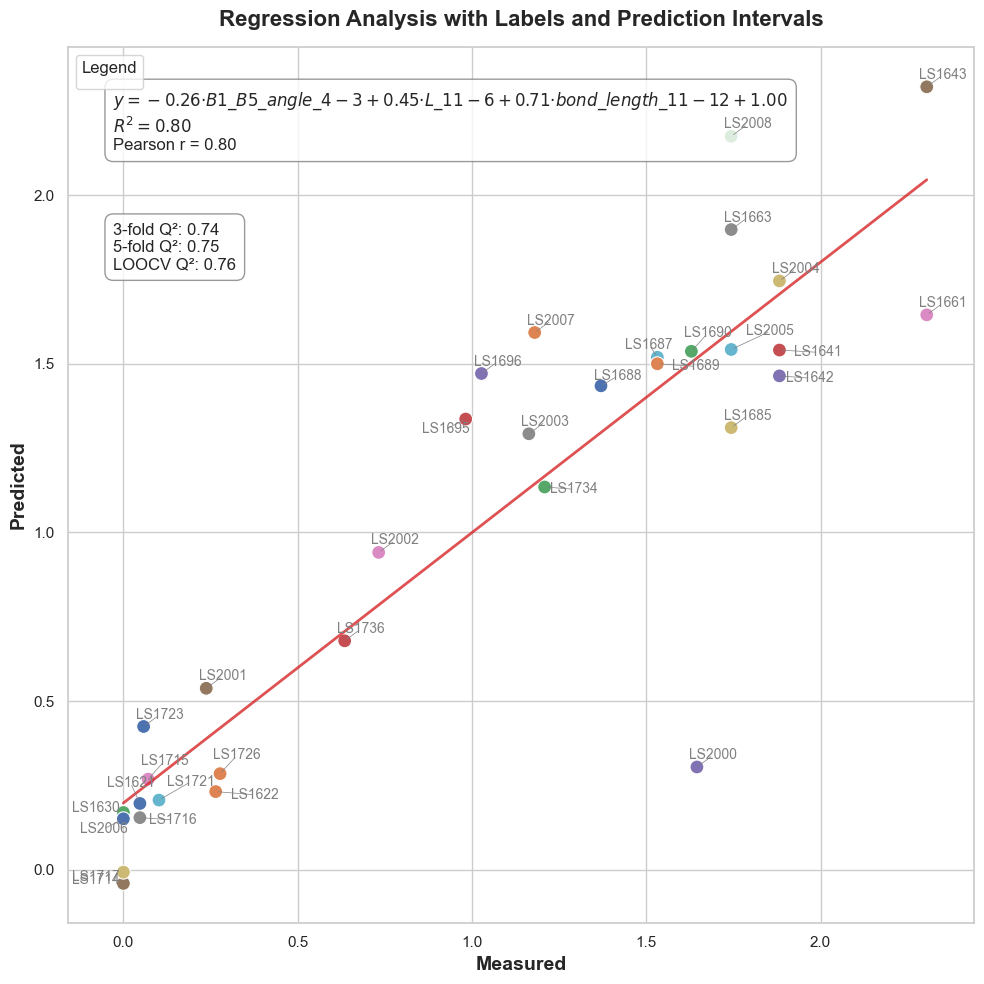

Plot generated successfully.
Finished generate_and_display_q2_scatter_plot.


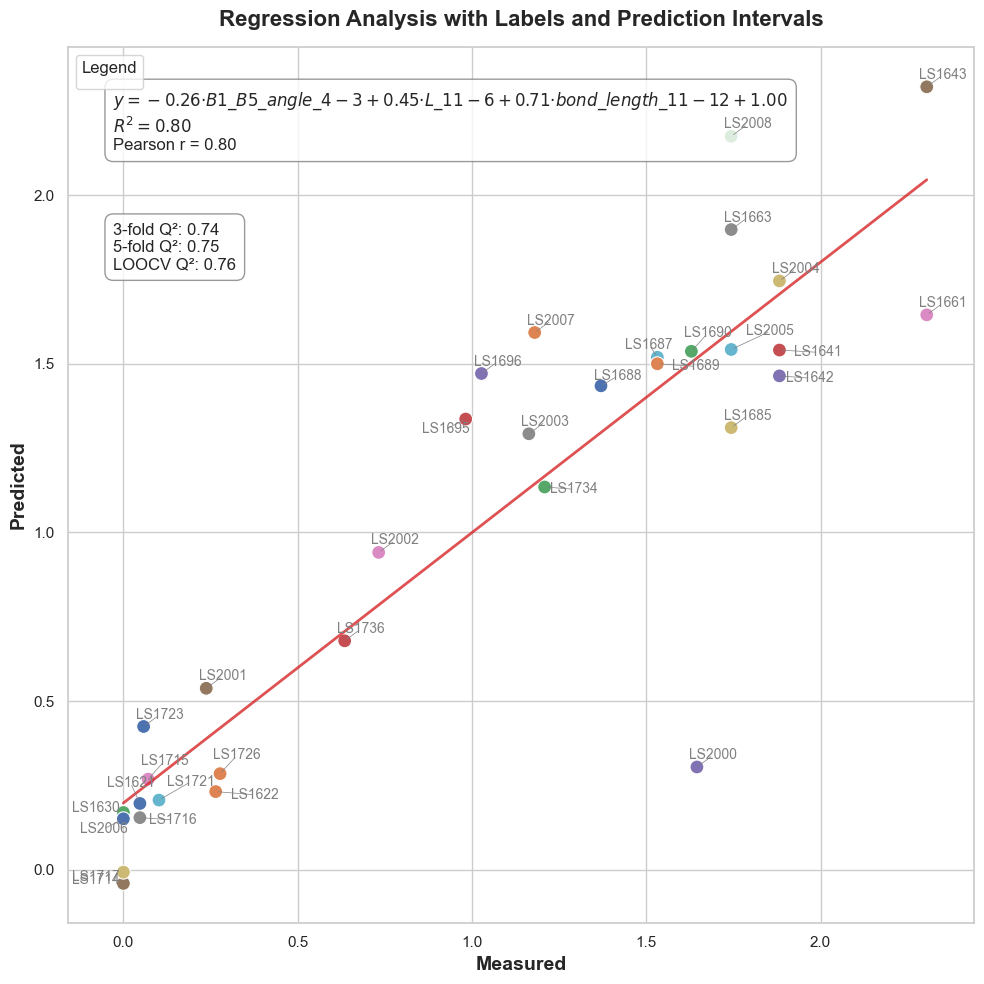

In [2]:
csv_path=r'C:\Users\edens\Documents\GitHub\lucas_project\new_update_logs\comp_set_app1.csv'


csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}
# ('B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12')
Regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', output_name='output', leave_out=None, min_features_num=2, max_features_num=None, metrics=None, return_coefficients=False)
features_combination=['B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12']
plot.generate_and_display_q2_scatter_plot(Regression_model,features_combination)
# fit_and_evaluate_single_combination_regression(Regression_model,['B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12'],r2_threshold=0,bool_parallel=False)

Creating table at location: results_output2.db
Table has been created successfully at location: results_output2.db 
Created flag: True
linear model selected
leave_out: None
Using 1 jobs for evaluation. found 20 cores


Calculating combos with threshold 0.85 (single-core): 100%|██████████| 4960/4960 [00:52<00:00, 95.13it/s] 


| formula                                                                      |       R.sq |        Q.sq |         MAE |   Model_id |
|:-----------------------------------------------------------------------------|-----------:|------------:|------------:|-----------:|
| ('Amplitude_Stretch_4_10', 'dipole_y_5-6-1', 'B5_7-1')                       | 0.883555   |    0.796733 |    0.174936 |          0 |
| ('Frequency_Stretch_4_10', 'B5_7-1', 'loc_B5_10-4')                          | 0.867961   |    0.75474  |    0.174111 |          1 |
| ('Frequency_Stretch_4_10', 'B5_7-1', 'B5_10-4')                              | 0.854997   |    0.753533 |    0.176433 |          2 |
| ('Frequency_Stretch_4_10', 'diff_13-6_charge', 'B1_B5_angle_7-1')            | 0.857649   |    0.739539 |    0.196766 |          3 |
| ('Amplitude_Stretch_4_10', 'dipole_y_5-4-3', 'B1_10-4')                      | 0.546307   | -inf        | -inf        |       2483 |
| ('dipole_z_5-6-1', 'dipole_y_11-10-4', 'L_7-1')      

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


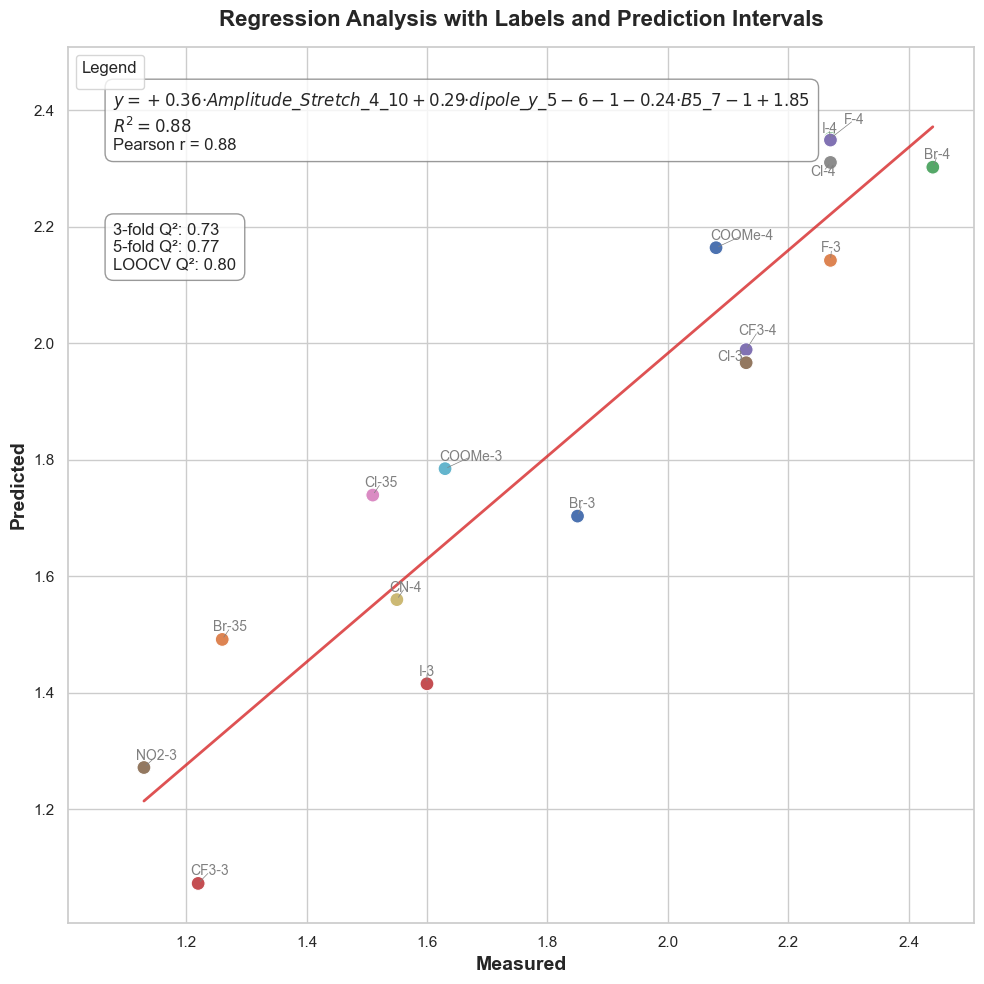

| formula                                                                      |       R.sq |        Q.sq |         MAE |   Model_id |
|:-----------------------------------------------------------------------------|-----------:|------------:|------------:|-----------:|
| ('Amplitude_Stretch_4_10', 'dipole_y_5-6-1', 'B5_7-1')                       | 0.883555   |    0.796733 |    0.174936 |          0 |
| ('Frequency_Stretch_4_10', 'B5_7-1', 'loc_B5_10-4')                          | 0.867961   |    0.75474  |    0.174111 |          1 |
| ('Frequency_Stretch_4_10', 'B5_7-1', 'B5_10-4')                              | 0.854997   |    0.753533 |    0.176433 |          2 |
| ('Frequency_Stretch_4_10', 'diff_13-6_charge', 'B1_B5_angle_7-1')            | 0.857649   |    0.739539 |    0.196766 |          3 |
| ('Amplitude_Stretch_4_10', 'dipole_y_5-4-3', 'B1_10-4')                      | 0.546307   | -inf        | -inf        |       2483 |
| ('dipole_z_5-6-1', 'dipole_y_11-10-4', 'L_7-1')      

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Results saved to regression_results.txt in C:\Users\edens\Documents\GitHub\lucas_project\Doyle2021\logfiles


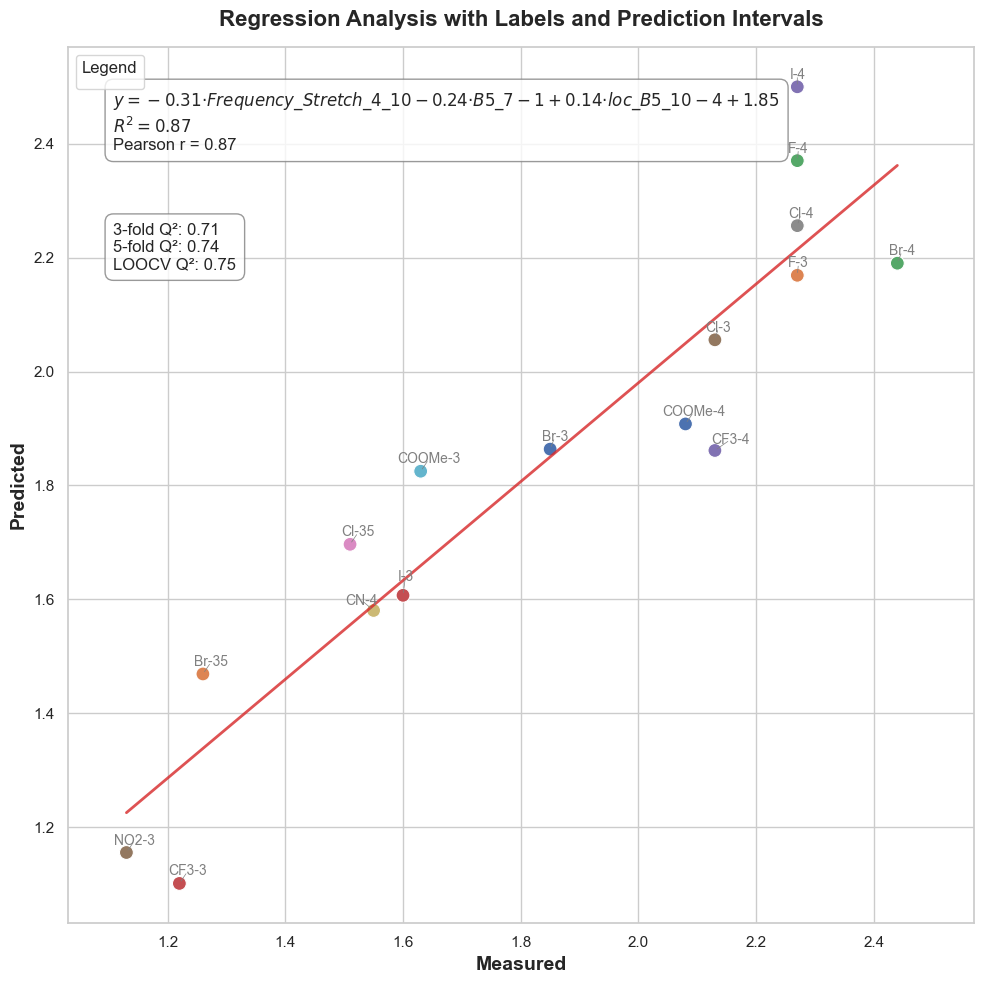

Exiting model selection.


In [4]:
csv_path=   r'C:\Users\edens\Documents\GitHub\lucas_project\Secondary_Sphere\feather_benzal\output2.csv'


csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}

Regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', output_name='output', leave_out=None, min_features_num=2, max_features_num=None, metrics=None, return_coefficients=False)
results=Regression_model.fit_and_evaluate_combinations(top_n=None)

Creating table at location: results_output_bench.db
Table has been created successfully at location: results_output_bench.db 
Created flag: True
linear model selected
leave_out: None
Using 1 jobs for evaluation. found 20 cores


Calculating combos with threshold 0.85 (single-core): 100%|██████████| 969/969 [00:09<00:00, 97.18it/s] 


| formula                                |       R.sq |        Q.sq |         MAE |   Model_id |
|:---------------------------------------|-----------:|------------:|------------:|-----------:|
| ('B5', 'L ', 'd-y (μL)')               | 0.921736   |    0.881881 |    0.13007  |          0 |
| ('B5', 'L*B5', 'd-y (μL)')             | 0.922935   |    0.873516 |    0.1374   |          1 |
| ('B5', 'd-y (μL)', 'HNBO ')            | 0.903085   |    0.853724 |    0.13721  |          2 |
| ('B5', 'd-y (μL)', 'CNBO ')            | 0.89689    |    0.847838 |    0.142358 |          3 |
| ('B5', 'd-y (μL)', 'intC=O')           | 0.90092    |    0.846227 |    0.146004 |          4 |
| ('L ', 'L*B5', 'd-y (μL)')             | 0.918455   |    0.841395 |    0.148127 |          5 |
| ('B5', 'd-y (μL)')                     | 0.883396   |    0.836644 |    0.147948 |          6 |
| ('B5', 'd-y (μL)', 'd-z')              | 0.883396   |    0.836644 |    0.147948 |          7 |
| ('B5', 'd-total', 'd-y (μL)'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



3-fold CV

|   Q2_3_Fold |      MAE |
|------------:|---------:|
|    0.839271 | 0.151919 |

5-fold CV

|   Q2_5_Fold |      MAE |
|------------:|---------:|
|    0.868914 | 0.136675 |

LOOCV

|   Q2_LOOCV |     MAE |
|-----------:|--------:|
|   0.881881 | 0.13007 |
Results saved to regression_results.txt in C:\Users\edens\Documents\GitHub\lucas_project\Doyle2021\logfiles


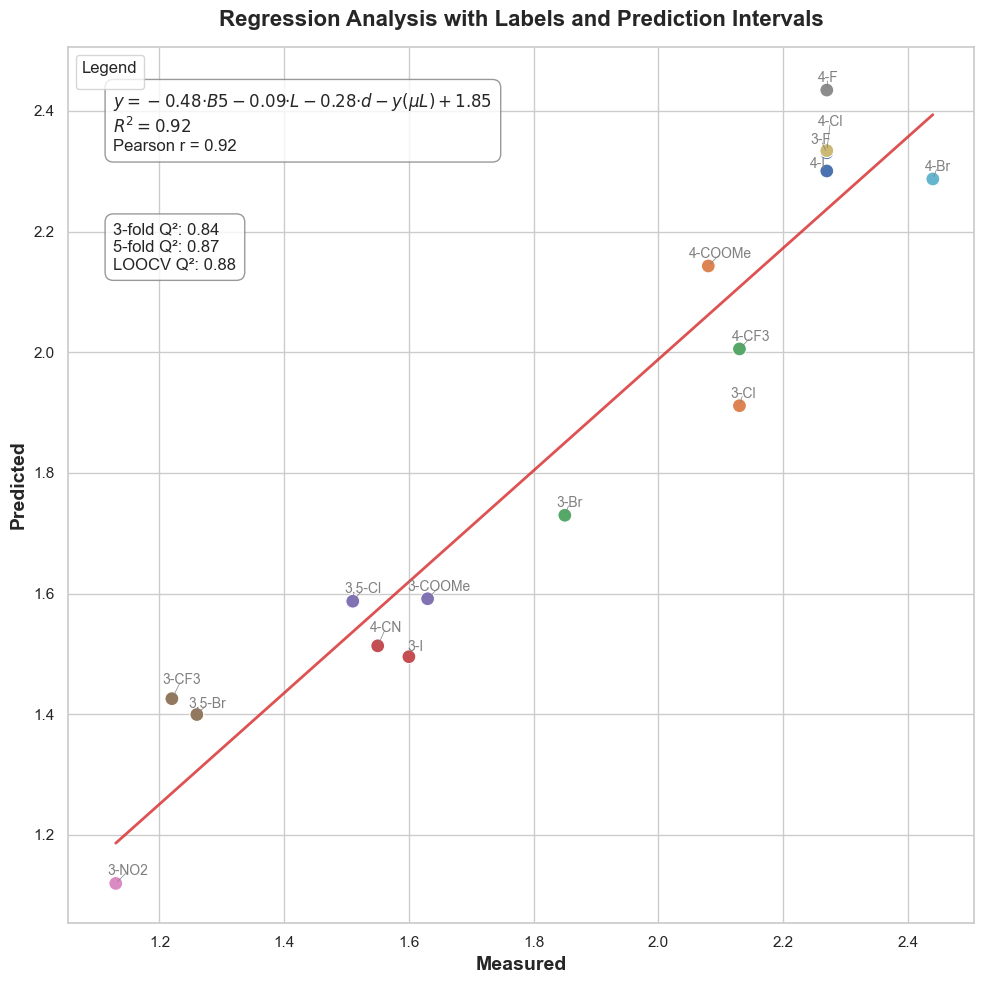

Exiting model selection.


In [5]:
csv_path=   r'C:\Users\edens\Documents\GitHub\lucas_project\Secondary_Sphere\feather_benzal\output_bench.csv'


csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}

Regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', output_name='output', leave_out=None, min_features_num=2, max_features_num=None, metrics=None, return_coefficients=False)
results=Regression_model.fit_and_evaluate_combinations(top_n=None)

In [9]:
os.chdir(r'C:\Users\edens\Documents\GitHub\lucas_project\new_logs_substrate')
df=get_df_from_file(r'molecule.xyz')